## **Sistema IEEE 4-bus test case Y-Y**

In [ ]:
#importando as bibliotecas necessárias 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
#função para plotar os gráficos
def plotLS(x,y,title):
  plt.figure(figsize=(10,8))
  plt.plot(x,y)
  plt.xlabel('Horas do dia')
  plt.ylabel('kWh')
  plt.title(f'{title}',fontsize = 15)
  plt.grid()
  plt.show()


## **Load Shape Residencial**

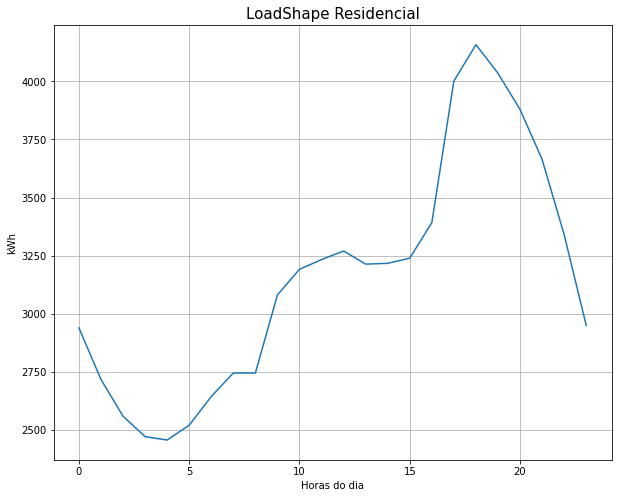

In [ ]:
#determinando o gráfico do LoadShape Residencial
horas = np.linspace(0,23,num = 24)

eres = [0.544181,0.503066,0.473728,0.457491,0.454773,0.46662,0.489477,0.508223,0.508223,0.570523,0.590941,0.598676,0.605505,0.595052,0.595679,0.599791,0.628153,0.741045,0.770035,0.747247,0.718397,0.678537,0.618537,0.546202]
rmax = np.max(eres)

for i in range(len(eres)):
  eres[i] = eres[i]*5400

plotLS(horas,eres,'LoadShape Residencial')


**Dimensionando o Sistema PV - Curva de Carga Residencial**

Calculando a Integral desta curva se obtém a energia, em kWh, consumida em um dia. Aqui utiliza-se a função np.trapz()  

In [ ]:
#cálculo da área sobre a curva - consumo diário e mensal
Edaily = np.trapz(eres,horas)
print(f'O consumo médio diário é de {np.round(Edaily,3)} kWh\n')

Emonth = Edaily*30
print(f'O consumo médio mensal é de {np.round(Emonth,3)} kWh\n')

O consumo médio diário é de 72710.517 kWh

O consumo médio mensal é de 2181315.501 kWh



In [ ]:
#considerando um padrão monofásico
Cmonth = Emonth - 30
print(f'Descontando o padrão monofásico o consumo mensal é {np.round(Cmonth,3)} kWh\n ')
Cdaily = Cmonth/30
print(f'Consumo diário  é {np.round(Cdaily,3)} kWh\n')

#levantando as horas de sol pico para o PV por meio do site do CRECESB
#Localização considerada foi campinas - Barão Geraldo
HSP = 4.68/1

#calculando a demanda de potência em kW
Ddaily = Cdaily/HSP
print(f'A demanda do sistema é de {np.round(Ddaily,3)} kWp')


Descontando o padrão monofásico o consumo mensal é 2181285.501 kWh
 
Consumo diário  é 72709.517 kWh

A demanda do sistema é de 15536.222 kWp


## **Load Shape Comercial**

[0.40136901 0.38850789 0.37480289 0.36073353 0.36069369 0.3739083
 0.43381697 0.54524834 0.64652918 0.71303683 0.74277494 0.75406056
 0.7596092  0.76595754 0.770035   0.76087974 0.7423099  0.66241452
 0.52092704 0.43910557 0.45288446 0.50072302 0.51768985 0.47370977]


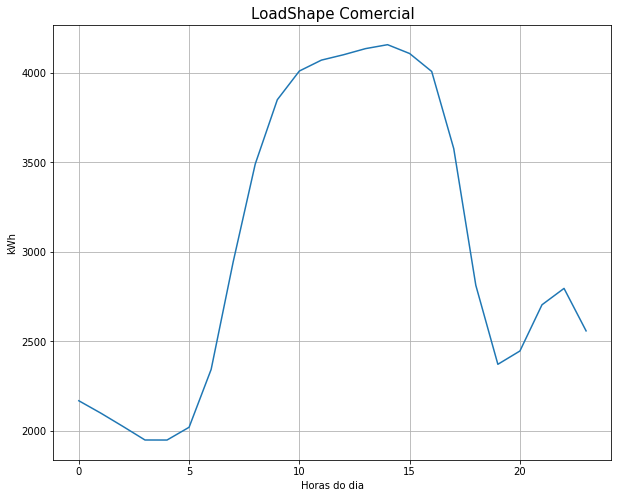

In [ ]:
#determinando os valores do LoadShape comercial
horas = np.linspace(0,23,num = 24)

#valores do loadshape pegos da biblioteca da EPRI - "Retail, Large" em Wh/sqft
ecom = np.array([0.706411289,	0.683775667,	0.659654801,	0.634892667,	0.634822549,	0.658080316,	0.763519861,	0.959639582,	1.137894309,	1.254948077,	1.307287296,	1.327150038,	1.336915674,	1.348088785,	1.355265125,	1.339151826,	1.306468818,	1.165852585,	0.91683397,	0.772827812,	0.797078716,	0.881274816,	0.911136499,	0.833731357])
Ecom = np.zeros(len(ecom))

#considera-se 60 metros quadrados
for i in range(len(ecom)):
  ecom[i] = (ecom[i]*645.835)/1000
cmax = np.max(ecom)

for j in range(len(ecom)):
  ecom[j] = ecom[j]/cmax
  ecom[j] = ecom[j]*rmax
  Ecom[j] = (ecom[j]*5400)

print(ecom)
plotLS(horas,Ecom,"LoadShape Comercial")


**Exportando estes dados para o Excel**

In [ ]:
pip install XlsxWriter

     |████████████████████████████████| 149 kB 5.0 MB/s 


In [ ]:
import xlsxwriter

workbook = xlsxwriter.Workbook("loadshapeCOM.xlsx")
worksheet = workbook.add_worksheet()

#worksheet.write(row, col, some_data)
for i in range(len(ecom)):
  worksheet.write(i,0,(ecom[i]))

workbook.close()

**Dimensionando o Sistema PV - Curva de Carga Comercial**

In [ ]:
#cálculo da área sobre a curva - consumo diário e mensal
Edcom = np.trapz(Ecom,horas)
print(f'O consumo médio diário é de {np.round(Edcom,3)} kWh\n')

Emcom = Edcom*30
print(f'O consumo médio mensal é de {np.round(Emcom,3)} kWh\n')

O consumo médio diário é de 70330.617 kWh

O consumo médio mensal é de 2109918.512 kWh



In [ ]:
#considerando um padrão monofásico
Cmcom = Emcom - 30
print(f'Descontando o padrão monofásico o consumo mensal é {np.round(Cmcom,3)} kWh\n ')
Cdcom = Cmcom/30
print(f'Consumo diário  é {np.round(Cdcom,3)} kWh\n')

#levantando as horas de sol pico para o PV por meio do site do CRECESB
#Localização considerada foi campinas - Barão Geraldo
HSP = 4.68/1

#calculando a demanda de potência em kW
Ddcom = Cdcom/HSP
print(f'A demanda do sistema é de {np.round(Ddcom,3)} kWp')

Descontando o padrão monofásico o consumo mensal é 2109888.512 kWh
 
Consumo diário  é 70329.617 kWh

A demanda do sistema é de 15027.696 kWp


# **Load Shape Industrial**

[0.5765252  0.5765252  0.58172294 0.57221301 0.57032642 0.59219542
 0.64043811 0.69988481 0.74550939 0.76402873 0.76526078 0.76579981
 0.76953448 0.770035   0.7611796  0.74254475 0.71767262 0.69326251
 0.67624474 0.66869839 0.66619578 0.66099804 0.64594386 0.61633601]


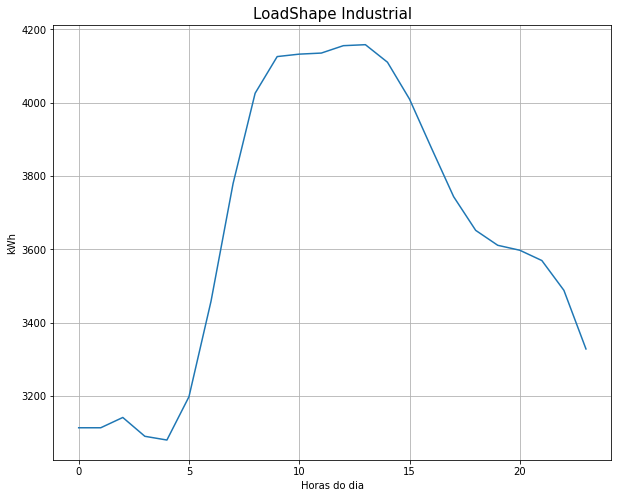

In [ ]:
#determinando os valores do LoadShape comercial
horas = np.linspace(0,23,num = 24)

#Os dados do load shape
indlight = np.array([0.6908,0.6908,0.6968,0.6794,0.6760,0.7128,0.7930,0.8904,0.9636,0.9921,0.9933,0.9942,1,1,0.9846,0.9538,0.9136,0.8745,0.8472,0.8346,0.8295,0.8203,0.7966,0.7529])
indmachine = np.array([0.8066,0.8066,0.8141,0.8068,0.8053,0.8253,0.8704,0.9274,0.9727,0.9923,0.9943,0.9948,0.9987,1,0.9924,0.9748,0.9504,0.9261,0.9092,0.9022,0.9008,0.8965,0.8811,0.8479])
eind = np.zeros(len(indmachine))
Eind = np.zeros(len(indmachine))
for i in range(len(indmachine)):
  eind[i] = indlight[i] + indmachine[i]
imax = np.max(eind)
for j in range(len(eind)):
  eind[j] = eind[j]/imax
  eind[j] = eind[j]*rmax
  Eind[j] = eind[j]*5400

print(eind)
#plotando
plotLS(horas,Eind,"LoadShape Industrial")


**Exportando para o Excel**

In [ ]:
workbook = xlsxwriter.Workbook("loadshapeIND.xlsx")
worksheet = workbook.add_worksheet()

#worksheet.write(row, col, some_data)
for i in range(len(eind)):
  worksheet.write(i,0,eind[i])

workbook.close()

**Dimensionando o Sistema PV - Curva de Carga Industrial**

In [ ]:
#cálculo da área sobre a curva - consumo diário e mensal
Edind = np.trapz(Eind,horas)
print(f'O consumo médio diário é de {np.round(Edind,3)} kWh\n')

Emind = Edind*30
print(f'O consumo médio mensal é de {np.round(Emind,3)} kWh\n')

O consumo médio diário é de 84470.283 kWh

O consumo médio mensal é de 2534108.49 kWh



In [ ]:
#considerando um padrão monofásico
Cmind = Emind - 30
print(f'Descontando o padrão monofásico o consumo mensal é {np.round(Cmind,3)} kWh\n ')
Cdind = Cmind/30
print(f'Consumo diário  é {np.round(Cdind,3)} kWh\n')

#levantando as horas de sol pico para o PV por meio do site do CRECESB
#Localização considerada foi campinas - Barão Geraldo
HSP = 4.68/1

#calculando a demanda de potência em kW
Ddind = Cdind/HSP
print(f'A demanda do sistema é de {np.round(Ddind,3)} kWp')

Descontando o padrão monofásico o consumo mensal é 2534078.49 kWh
 
Consumo diário  é 84469.283 kWh

A demanda do sistema é de 18048.992 kWp


# **Comparando os 3 Load Shapes**

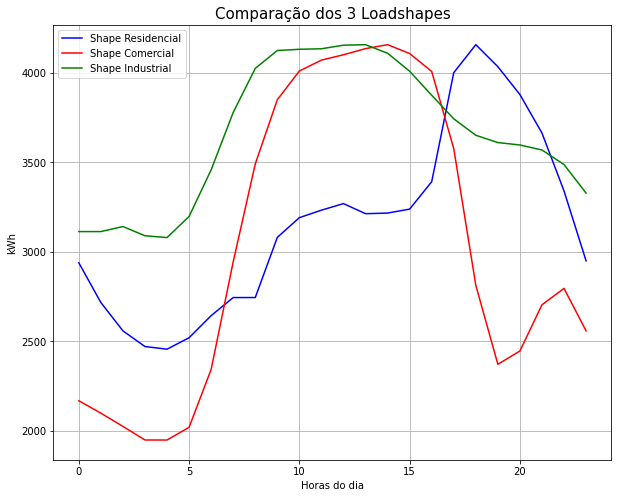

In [ ]:
  plt.figure(figsize=(10,8))
  plt.plot(horas,eres, color='b',label = 'Shape Residencial')
  plt.plot(horas,Ecom, color='r',label = 'Shape Comercial')
  plt.plot(horas,Eind, color='g',label = 'Shape Industrial')
  plt.legend(loc='best')
  plt.xlabel('Horas do dia')
  plt.ylabel('kWh')
  plt.title('Comparação dos 3 Loadshapes',fontsize = 15)
  plt.grid()
  plt.show()

# **Cálculo Desequilibrio**

In [ ]:
def cpsim(Va,Vb,Vc):
  a = -0.5+0.866025j
  a2 = a**2
  Vp = (1/3)*(Va+(a*Vb)+(a2*Vc))
  Vn = (1/3)*(Va+(a2*Vb)+(a*Vc))
  Vz = (1/3)*(Va+Vb+Vc)
  return Vp,Vn,Vz 

In [ ]:
def desq(Vp,Vn):
  Fd = (np.abs(Vn)/np.abs(Vp))*100
  return Fd

In [ ]:
#Shape Residencial 
print('Shape Residencial\n')
#N2
vp2,vn2,vz2 = cpsim(10.767+6.166j,-0.0433-12.414j,-10.717+6.237j)
fd2 = desq(vp2,vn2)
print('O fator de Desequilibrio para barra N2 é: ',np.round(fd2,3),'%')

#N3
vp3,vn3,vz3 = cpsim(3.564+1.911j,-0.134-4.046j,-3.432+2.136j)
fd3 = desq(vp3,vn3)
print('O fator de Desequilibrio para barra N3 é: ',np.round(fd3,3),'%')

#N4
vp4,vn4,vz4 = cpsim(3.425+1.685j,-0.309-3.836j,-3.120+2.152j)
fd4 = desq(vp4,vn4)
print('O fator de Desequilibrio para barra N4 é: ',np.round(fd4,3),'%')


Shape Residencial

O fator de Desequilibrio para barra N2 é:  0.032 %
O fator de Desequilibrio para barra N3 é:  0.098 %
O fator de Desequilibrio para barra N4 é:  0.904 %


In [ ]:
#Shape Comercial
print('Shape Comercial\n')
#N2
vp2,vn2,vz2 = cpsim(10.764+6.190j,-0.0434-12.423j,-10.726+6.242j)
fd2 = desq(vp2,vn2)
print('O fator de Desequilibrio para barra N2 é: ',np.round(fd2,3),'%')

#N3
vp3,vn3,vz3 = cpsim(3.570+1.938j,-0.114-4.063j,-3.458+2.128j)
fd3 = desq(vp3,vn3)
print('O fator de Desequilibrio para barra N3 é: ',np.round(fd3,3),'%')

#N4
vp4,vn4,vz4 = cpsim(3.456+1.738j,-0.265-3.885j,-3.191+2.144j)
fd4 = desq(vp4,vn4)
print('O fator de Desequilibrio para barra N4 é: ',np.round(fd4,3),'%')

Shape Comercial

O fator de Desequilibrio para barra N2 é:  0.089 %
O fator de Desequilibrio para barra N3 é:  0.09 %
O fator de Desequilibrio para barra N4 é:  0.718 %


In [ ]:
#Shape Industrial
print('Shape Industrial\n')
#N2
vp2,vn2,vz2 = cpsim(10.759+6.161j,-0.0433-12.405j,-10.708+6.232j)
fd2 = desq(vp2,vn2)
print('O fator de Desequilibrio para barra N2 é: ',np.round(fd2,3),'%')

#N3
vp3,vn3,vz3 = cpsim(3.555+1.890j,-0.148-4.028j,-3.409+2.139j)
fd3 = desq(vp3,vn3)
print('O fator de Desequilibrio para barra N3 é: ',np.round(fd3,3),'%')

#N4
vp4,vn4,vz4 = cpsim(3.396+1.627j,-0.345-3.786j,-3.048+2.158j)
fd4 = desq(vp4,vn4)
print('O fator de Desequilibrio para barra N4 é: ',np.round(fd4,3),'%')

Shape Industrial

O fator de Desequilibrio para barra N2 é:  0.034 %
O fator de Desequilibrio para barra N3 é:  0.105 %
O fator de Desequilibrio para barra N4 é:  1.012 %
